# Loan Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
loan_data = pd.read_csv('Loan Prediction.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [3]:
loan_data.shape

(381, 13)

In [4]:
#checking the nan values
loan_data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

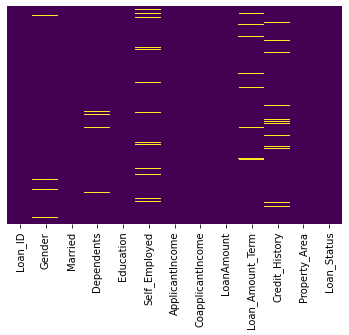

In [5]:
#visualizing nan values
sns.heatmap(loan_data.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')
plt.show()

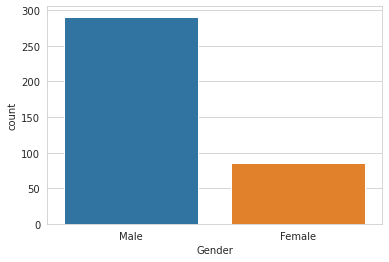

In [6]:
#checking the ratio of male over female
sns.set_style('whitegrid')
sns.countplot(x = 'Gender', data = loan_data)
plt.show()

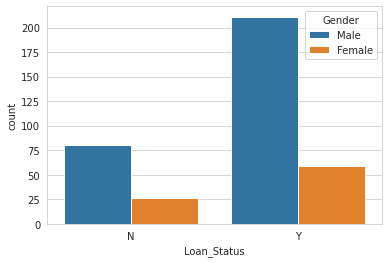

In [7]:
#checking how many male and female had took loan
sns.countplot(x = 'Loan_Status', hue = 'Gender', data = loan_data)
plt.show()

In [8]:
#since there are more number of male over female so, we will fillup the nan spaces with the most frequent data i.e., male
impute_frequent = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
fix_nan = impute_frequent.fit(loan_data.iloc[:, 1:2])
loan_data.iloc[:, 1:2] = fix_nan.transform(loan_data.iloc[:, 1:2])

In [9]:
#checking fixed nan value in Gender column
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

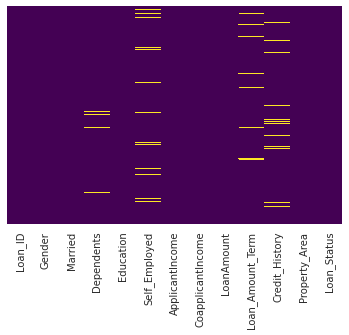

In [10]:
#visualizing the nan values
sns.heatmap(loan_data.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')
plt.show()

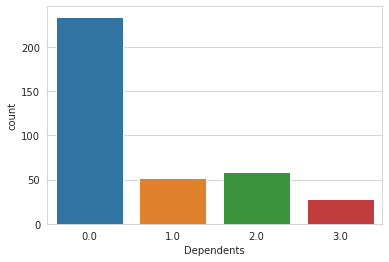

In [11]:
#checking the ratio of dependents
sns.countplot(x = 'Dependents', data = loan_data)
plt.show()

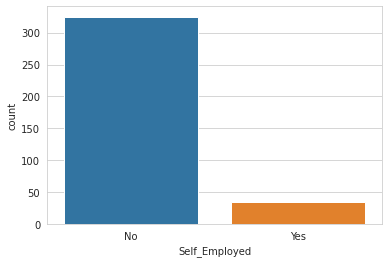

In [12]:
sns.countplot(x = loan_data['Self_Employed'])
plt.show()

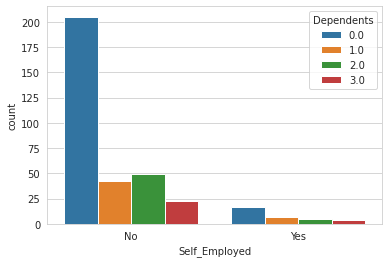

In [13]:
#checking the dependents on the basis of selfemployed
sns.countplot(x = 'Self_Employed', hue = 'Dependents', data = loan_data)
plt.show()

In [14]:
#fixing the missing value for depemdents and self_employed
impute_frequent = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
fix_nan = impute_frequent.fit(loan_data.iloc[:, [3, 5]])
loan_data.iloc[:, [3, 5]] = fix_nan.transform(loan_data.iloc[:, [3, 5]])

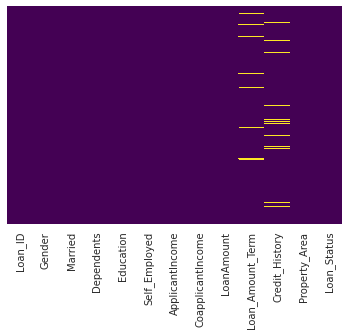

In [15]:
sns.heatmap(loan_data.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')
plt.show()

In [16]:
#checking how many unique values are there in Loan_Amount_column
unique_value = set(loan_data['Loan_Amount_Term'].dropna())
unique_value

{12.0, 36.0, 60.0, 84.0, 120.0, 180.0, 240.0, 300.0, 360.0, 480.0}

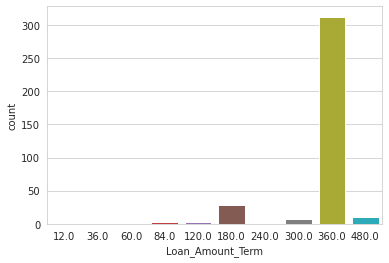

In [17]:
sns.countplot(x = 'Loan_Amount_Term', data = loan_data)
plt.show()

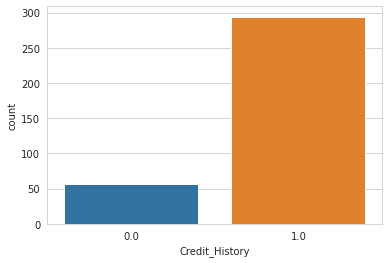

In [18]:
sns.countplot(x = 'Credit_History', data = loan_data)
plt.show()

In [19]:
#fixing the nan values for Loan_Amount_Term column & Credit_History column
impute_frequent = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
fix_nan = impute_frequent.fit(loan_data.iloc[:, [9, 10]])
loan_data.iloc[:, [9, 10]] = fix_nan.transform(loan_data.iloc[:, [9, 10]])

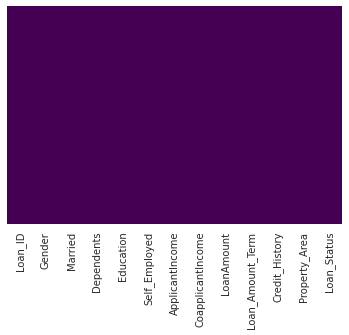

In [20]:
#visualizing the nan values
sns.heatmap(loan_data.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')
plt.show()

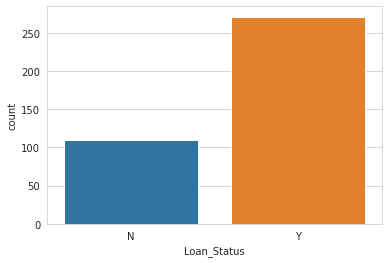

In [21]:
#checking whether the dataset is balanced or not
sns.countplot(loan_data['Loan_Status'])
plt.show()

In [22]:
x = loan_data.iloc[:, 0:12]
y = loan_data.iloc[:, -1]

In [23]:
#creating dummy variables for Gender
gender = pd.get_dummies(x["Gender"], drop_first = True)

In [24]:
#creating dummy var for Married
married = pd.get_dummies(x['Married'], drop_first = True)

In [25]:
#creating dummy var for Education
education = pd.get_dummies(x['Education'], drop_first = True)

In [26]:
#creating dummy var for Self_Employed
self_emp = pd.get_dummies(x['Self_Employed'], drop_first = True)
self_emp.columns = ['yes_employed'] #changing the column name

In [27]:
prop_area = pd.get_dummies(x['Property_Area'], drop_first = True)

In [28]:
#concatinating the dummies.
x = pd.concat([x, gender, married, education, self_emp, prop_area], axis = 1)
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Male,Yes,Not Graduate,yes_employed,Semiurban,Urban
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,1,1,0,0,0,0
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1,1,0,1,0,1
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1,1,1,0,0,1
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1,0,0,0,0,1
4,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,1,1,1,0,0,1


In [29]:
#dropping the extra features
x.drop(['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], axis = 1, inplace = True)

In [30]:
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,yes_employed,Semiurban,Urban
0,1.0,4583,1508.0,128,360.0,1.0,1,1,0,0,0,0
1,0.0,3000,0.0,66,360.0,1.0,1,1,0,1,0,1
2,0.0,2583,2358.0,120,360.0,1.0,1,1,1,0,0,1
3,0.0,6000,0.0,141,360.0,1.0,1,0,0,0,0,1
4,0.0,2333,1516.0,95,360.0,1.0,1,1,1,0,0,1


In [31]:
y

0      N
1      Y
2      Y
3      Y
4      Y
      ..
376    Y
377    Y
378    Y
379    Y
380    N
Name: Loan_Status, Length: 381, dtype: object

In [32]:
#creating the dummy variable for dependent variable, since y is not in the form of dataframe, making it to dframe
y = pd.DataFrame(y)
y.head()

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y


In [33]:
y = pd.get_dummies(y['Loan_Status'], drop_first = True)
y.head()

,Y
0,0
1,1
2,1
3,1
4,1


In [34]:
x.shape, y.shape

((381, 12), (381, 1))

In [35]:
np.ndim(x), np.ndim(y)

(2, 2)

In [36]:
#now computing the score of features and selecting the important features
best_features = SelectKBest(score_func = chi2, k = 10)
best_features_fit = best_features.fit(x, y)

In [37]:
scores = pd.DataFrame(best_features_fit.scores_)
features = pd.DataFrame(x.columns)
features_scores = pd.concat([features, scores], axis = 1)
features_scores.columns = ['features', 'scores']
features_scores

,features,scores
0,Dependents,0.104378
1,ApplicantIncome,22.118744
2,CoapplicantIncome,132.529400
3,LoanAmount,4.945626
4,Loan_Amount_Term,12.597226
5,Credit_History,21.184002
6,Male,0.035034
7,Yes,1.308333
8,Not Graduate,0.858960
9,yes_employed,0.111450


In [38]:
features_scores.nlargest(7, 'scores')

,features,scores
2,CoapplicantIncome,132.529400
1,ApplicantIncome,22.118744
5,Credit_History,21.184002
4,Loan_Amount_Term,12.597226
10,Semiurban,5.538793
3,LoanAmount,4.945626
7,Yes,1.308333


In [39]:
#selecing 3 best features for x
x = x.iloc[:, [2, 1, 5]].values
y = y.values
y = y.ravel()

In [40]:
#scalling the data
sc = StandardScaler()
x = sc.fit_transform(x)

In [41]:
#creating train test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [42]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [43]:
y_pred = classifier.predict(x_test)

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12, 16],
       [ 1, 67]])

In [46]:
accuracy = accuracy_score(y_test, y_pred) * 100
round(accuracy)

82.0